In [1]:
# This notebook runs from the projects root directory.
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
from stable_baselines3 import DQN, A2C
from environments.discrete_env_v1 import PortfolioManagementEnv

In [3]:
train_df = pd.read_csv('data\dow_10_returns_train.csv', index_col=0, parse_dates=True)
val_df = pd.read_csv('data\dow_10_returns_val.csv', index_col=0, parse_dates=True)

TICKERS = ['AXP', 'AAPL', 'BA', 'GS', 'INTC', 'JNJ', 'KO', 'NKE', 'PG', 'DIS']
RETURN_COLS = ['RF_RETURN'] + [f'{ticker}_RETURN' for ticker in TICKERS]
FEATURE_COLS = RETURN_COLS

In [4]:
train_env = PortfolioManagementEnv(
    train_df, RETURN_COLS, feature_cols=FEATURE_COLS, window_size=30, episode_length=-1
)

val_env = PortfolioManagementEnv(
    val_df, RETURN_COLS, feature_cols=FEATURE_COLS, window_size=30, episode_length=-1
)

In [5]:
experiment_id = 'EXPERIMENT_4_1678456489'

0it [00:00, ?it/s]

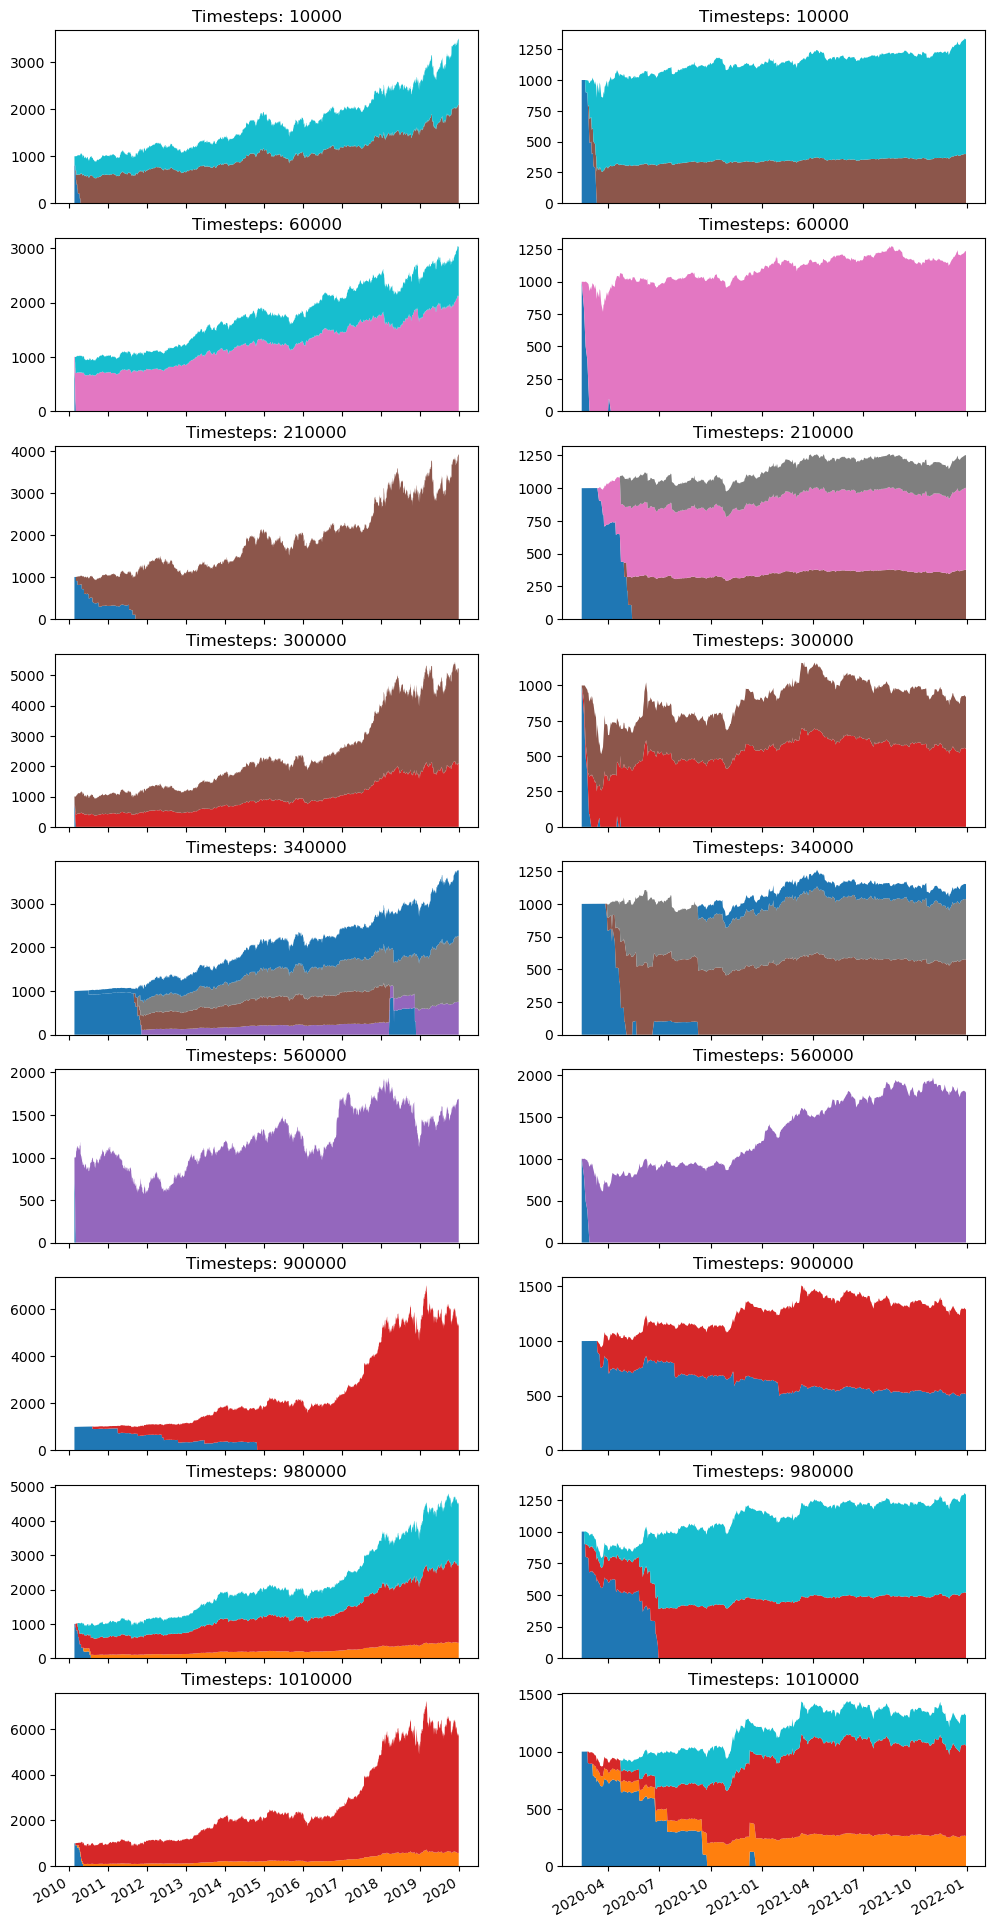

In [7]:
envs = (train_env, val_env)
model_numbers = (10_000, 60_000, 210_000, 300_000, 340_000, 560_000, 900_000, 980_000, 1_010_000)

fig, axes = plt.subplots(len(model_numbers), len(envs), figsize=(6*len(envs), 3*len(model_numbers))) # each figure is 6 by 3
for i,model_number in tqdm(enumerate(model_numbers)):
    model = A2C.load(f'experiments/models/{experiment_id}/{model_number}')
    for j,env in enumerate(envs):
        obs, done = env.reset(), False
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
        env.render(axes[i,j], title=f'Timesteps: {model_number}')
        env.close()